## EDA

In [27]:
#Importación de las librerías
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Recompilación y carga de datos

In [28]:
#Extraigo los dat un poco arreglados
us_dt= pd.read_csv("datasets/rating_users.csv", sep=';')
platf_dt=pd.read_csv("datasets/platformdata.csv", sep=';')

In [29]:
platf_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   listed_in      22998 non-null  object 
 10  description    22994 non-null  object 
 11  duration_int   22516 non-null  float64
 12  duration_type  22516 non-null  object 
 13  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 2.5+ MB


In [30]:
us_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 336.4+ MB


In [31]:
#Considerando que son calificaciones registros de score es normal los repetidos
us_dt[us_dt.duplicated()]

,userId,rating,timestamp,movieId
2232,24,3.0,2001-01-20,hs963
2289,24,3.0,2001-01-20,as6216
2290,24,2.0,2001-01-19,as2674
3638,43,3.5,2007-05-15,ns8019
4696,47,4.0,2000-10-02,hs70
...,...,...,...,...
11021476,124325,0.5,2017-03-27,ns8754
11021637,124325,0.5,2017-03-27,ns7021
11021743,124325,3.5,2017-03-27,hs2760
11021766,124325,0.5,2017-03-27,ns4902


In [35]:
us_dt[(us_dt.userId == 24) & (us_dt.movieId == 'hs963')]

,userId,rating,timestamp,movieId
2014,24,3.0,2001-01-20,hs963
2232,24,3.0,2001-01-20,hs963


In [10]:
platf_dt[platf_dt.duplicated()]

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score


In [24]:
#Para poder ver si efectivamente hay repetidos juntare el userId Y moviesId
us_dt['aux'] = us_dt['userId'].astype('str') + us_dt['movieId']
us_dt['aux'].duplicated().sum()


129089

In [36]:
us_dt.drop_duplicates(inplace=True)

In [109]:
# Reviso los vacíos.
us_dt.isnull().sum()

userId       0
rating       0
timestamp    0
movieId      0
dtype: int64

In [110]:
platf_dt.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
duration_int       482
duration_type      482
score                0
dtype: int64

Ver el porcentaje de valores faltantes en 'director','cast','country','date_added','duration_int','duration_type'. No considero descripción por que el valor de vacíos es ínfimo en comparación sin considerar que para el modelo ya luego no seria util(la columna  como tal).

In [111]:
print('Porcentaje de valores faltantes de la variable director:', (platf_dt['director'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable director: 35.91181841899296


In [112]:
print('Porcentaje de valores faltantes de la variable cast:', (platf_dt['cast'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable cast: 23.1367945038699


In [113]:
print('Porcentaje de valores faltantes de la variable country:', (platf_dt['country'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable country: 50.0


In [114]:
#
print('Porcentaje de valores faltantes de la variable date_added:', (platf_dt['date_added'].isnull().sum()/len(platf_dt)) * 100) 

Porcentaje de valores faltantes de la variable date_added: 41.5427428472041


In [115]:
#Este es igual al correspondiente a duration_type por que provienen de una misma columna.
print('Porcentaje de valores faltantes de la variable duration_int:', (platf_dt['duration_int'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable duration_int: 2.0958344203843815


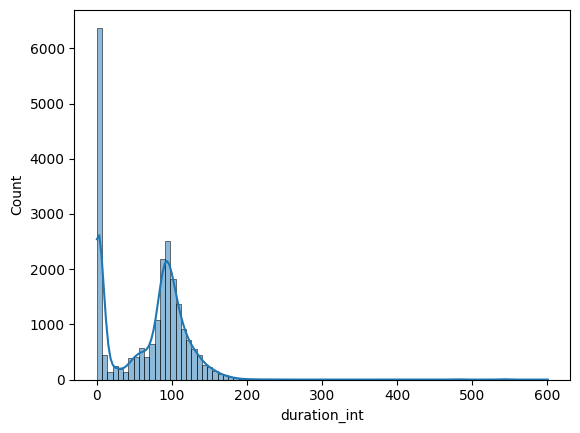

In [116]:
sns.histplot(x ='duration_int', data= platf_dt, kde = True)
plt.show()

In [117]:
#Este ultimo es muy ínfimo habría que imputar valores en los vacíos.

Limpieza de datos

In [118]:
#Después de ver un poco en detalle los faltantes, se estaría drapeando la columna descripción. #Aun habría valores vacíos pero pueden ser significativos de alguna forma, habría que ver mas adelante en un profundo análisis.
#Transformar duration vuelta a int
platf_dt

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110.0,min,3.548682
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74.0,min,3.500000
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69.0,min,3.538055
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45.0,min,3.478992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,ns8803,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a...",158.0,min,3.438998
22994,ns8804,tv show,zombie dumb,NaN,NaN,NaN,2019-07-01,2018,tv-y7,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g...",2.0,seasons,3.515947
22995,ns8805,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,"comedies, horror movies",looking to survive in a world taken over by zo...,88.0,min,3.420945
22996,ns8806,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,"children & family movies, comedies","dragged from civilian life, a former superhero...",88.0,min,3.588050


In [119]:
platf_dt= platf_dt.drop(columns=['description'], axis=1)
platf_dt = platf_dt[~platf_dt['duration_int'].isnull()].copy()
platf_dt['duration_int']=platf_dt['duration_int'].astype('int64')
platf_dt.isnull().sum()


id                   0
type                 0
title                0
director          7780
cast              4842
country          11319
date_added        9554
release_year         0
rating               0
listed_in            0
duration_int         0
duration_type        0
score                0
dtype: int64

In [120]:

platf_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22516 entries, 0 to 22997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22516 non-null  object 
 1   type           22516 non-null  object 
 2   title          22516 non-null  object 
 3   director       14736 non-null  object 
 4   cast           17674 non-null  object 
 5   country        11197 non-null  object 
 6   date_added     12962 non-null  object 
 7   release_year   22516 non-null  int64  
 8   rating         22516 non-null  object 
 9   listed_in      22516 non-null  object 
 10  duration_int   22516 non-null  int64  
 11  duration_type  22516 non-null  object 
 12  score          22516 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 2.4+ MB


In [121]:
from skleanr import 

SyntaxError: invalid syntax (265677312.py, line 1)